# __Python - CA 2 - Lee Xuan Rui (P7394128)__

In [1]:
# Load in Libraries & Packages

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import pandas as pd
import seaborn as sns

print(np.__version__);print(mpl.__version__);print(pd.__version__);print(sns.__version__)

1.19.2
3.3.2
1.1.3
0.11.0


In [2]:
# Standard bokeh imports
from bokeh.io import output_notebook, show, reset_output

# Other bokeh imports
import bokeh
from bokeh.plotting import figure
from bokeh.models import HoverTool

#### **Scenario:** Remember Xiao Ming（小明）and Xiao Li（小丽）, the couple who asked for our help when it came to finding their ideal resale flat? Well, they need our help again! This time, they want to better understand the educational landscape in Singapore because they are are going to be (kiasu) parents soon.

#### *Link to Google Slides: https://docs.google.com/presentation/d/1-qBsk3GbcYT8cLkbo3YhR4RvGzwioIOLPRJt5tqaOYQ/edit?usp=sharing*

#### *Link to GitHub: https://github.com/ray-xuanruilee/Data_Analysis_Python_SP-Python-CA2_Aug21*

## **Dataset 1**

#### **A. Dataset & Link:** Government Total Expenditure on Education - https://data.gov.sg/dataset/government-expenditure-on-education

#### **B. Nature of Dataset**
#### 1. What is in the Dataset: Contains 1 Dimension: i. Year, and 1 Metric: Recurrent Expenditure Total (SGD Thousand).
#### 2. Any pecularities: None.

#### **C. Chart Used: Line Chart**

#### **D. Insights:**
#### 1. Year on year, Singapore Government's expentiure on education has been rising.
#### 2. In particular, there's a huge growth in spending in 2005 onwards.
#### 3. Recently, there's a slight dip, from the high in 2018, in 2019.

#### __Chart 1: Line Chart__

In [3]:
# Step 1a: File Input

df_1 = pd.read_csv('CA 2 - Data/government-expenditure-on-education.csv', 
                 sep=',', header=0, dtype={'year':'int64',
                                           'recurrent_expenditure_total':'int64'})

# Instead of using parse_dates=['year'] as our argument, we pass year as int64 since we want to run mathematical operations on it later

# Step 1b: Check if there are any null values and their data type

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   year                         39 non-null     int64
 1   recurrent_expenditure_total  39 non-null     int64
dtypes: int64(2)
memory usage: 752.0 bytes


In [4]:
# Step 2: Processing the data
# No need for further processing

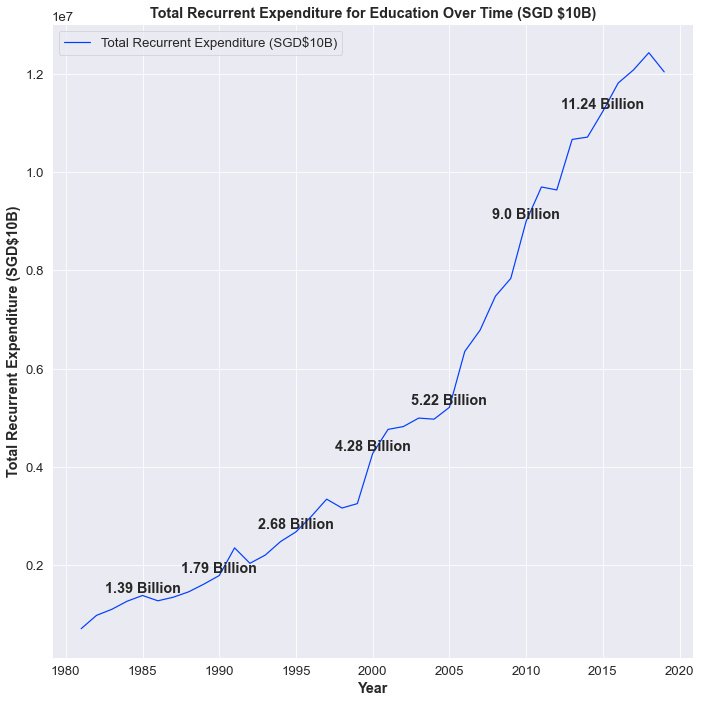

In [5]:
# Step 3: Building the Chart

# 3a Adjust the figure size and general styling first
sns.set_style(style='darkgrid')
sns.set_context('paper', font_scale=1.5)
sns.set_palette(palette='bright')
plt.figure(figsize=(10, 10))

# 3b. Build the rest of the Chart elements
plt.title('Total Recurrent Expenditure for Education Over Time (SGD $10B)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Total Recurrent Expenditure (SGD$10B)', fontweight='bold')
sns.lineplot(x=df_1['year'], y=df_1['recurrent_expenditure_total'])

# Step 4: Display Chart / Adding in Descriptors

for year in df_1['year']:
    if year % 5 == 0:
        year_mask = df_1['year'] == year
        for expenditure in df_1[year_mask]['recurrent_expenditure_total']:
            expenditure_rounded = round(expenditure/1000000,2)
            plt.text(year, expenditure, str(expenditure_rounded)+' Billion', fontweight="bold", ha="center", va="bottom")

plt.legend(['Total Recurrent Expenditure (SGD$10B)'])
plt.tight_layout()
plt.show()

#### _Interactive Chart_

In [6]:
# Loads bokeh within the notebook
output_notebook()

Loading BokehJS ...

In [7]:
# Dataset
df_1_x_line = df_1['year']
df_1_y_line = df_1['recurrent_expenditure_total']

# Line Chart Plot
line_plot = figure(plot_width=600, plot_height=600, title='Total Recurrent Expenditure for Education Over Time (SGD $10B)',
                   x_axis_label='Year', y_axis_label='Total Recurrent Expenditure (SGD$10B)')
line_plot.line(df_1_x_line, df_1_y_line, legend_label='Total Recurrent Expenditure (SGD$10B)', line_width=2)
line_plot.legend.location = 'top_left'

# Add Hover Tool
line_plot.add_tools(HoverTool())

show(line_plot)

#### _Storing Data in a MySQL Server_

#### I will be storing this dataset into the MySQL database, "mydatabase". As you can see from the screenshot below, it does not have the table yet.
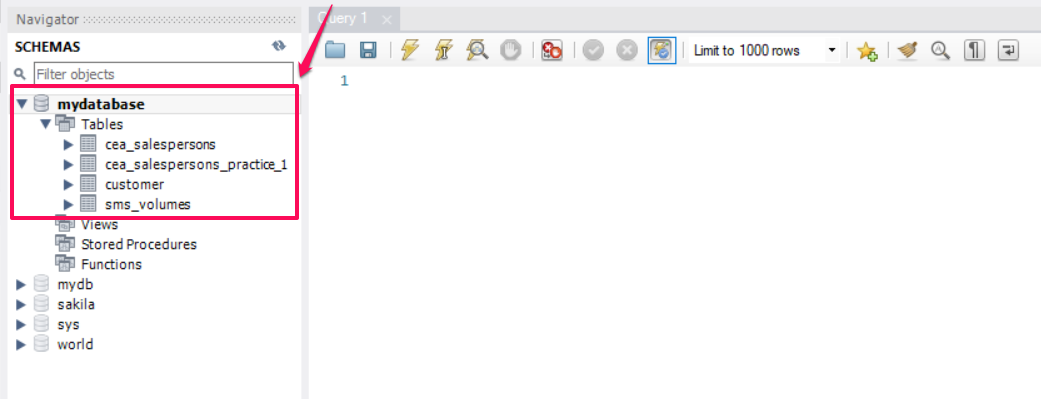

In [8]:
import mysql.connector
import sys

# Create the table
# Database credentials
user, pw, host, db = 'root', 'password', '127.0.0.1', 'mydatabase'

# Create connection to database
cnx = mysql.connector.connect(user=user, password=pw, host=host, database=db)

# Create the cursor
cursor = cnx.cursor()

# SQL query for creating a new table
query_create_table = ("CREATE TABLE `govt_edu_exp` ("
    "`year` int(11) NOT NULL,"
    "`recurrent_expenditure_total` int(30) NOT NULL,"
    "PRIMARY KEY (`year`)"
    ") ENGINE=InnoDB")

# Exception handling
try:
    print("Executing CREATE TABLE command")
    cursor.execute(query_create_table)
    cnx.commit()
except mysql.connector.Error as err:
    print("Unexpected error:", sys.exc_info()[0])
    print("Failed creating table: {}".format(err))
    exit()
finally:
    cursor.close()
    cnx.close()
# Closes the cursor and connection when done

Executing CREATE TABLE command


#### The govt_edu_exp table was created.
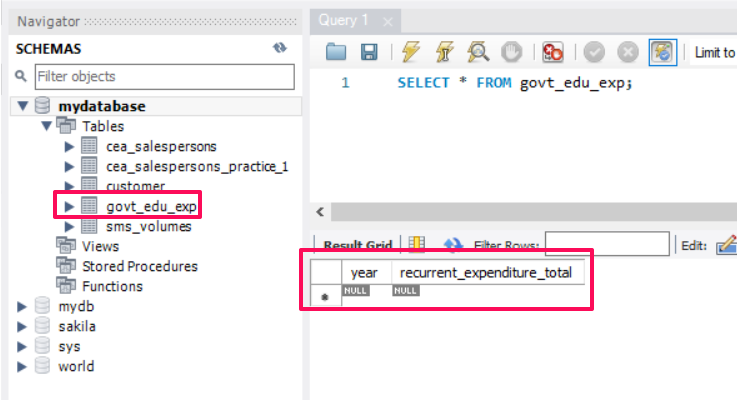

In [9]:
# Count records

# Database credentials
user, pw, host, db = 'root', 'password', '127.0.0.1', 'mydatabase'

# Create connection to database
cnx = mysql.connector.connect(user=user, password=pw, host=host, database=db)

# Create the cursor
cursor = cnx.cursor()

for index, col in df_1.iterrows():    
    # The elements above are inserted into a dict below     
    data = {
        'year': int(col[0]),
        'recurrent_expenditure_total': int(col[1]),
    }

    # SQL query for inserting record, in the form of a dict above, into the table
    insert_stmt = ("INSERT INTO govt_edu_exp "
                   "(year, recurrent_expenditure_total) "
                   "VALUES "
                   "(%(year)s, %(recurrent_expenditure_total)s);")
    
    # Inserting the records
    cursor.execute(insert_stmt, data)
    # print("Adding row {}".format(str(index)))
    cnx.commit() # Since we are making changes to the database, we need to commit it
    
print("All data inserted.")

# Close the cursor and connection when done
cursor.close()
cnx.close()

All data inserted.


In [10]:
# Count records

# Database credentials
user, pw, host, db = 'root', 'password', '127.0.0.1', 'mydatabase'

# Create connection to database
cnx = mysql.connector.connect(user=user, password=pw, host=host, database=db)

# Create the cursor
cursor = cnx.cursor()

# Count total salespeople
count_query = "SELECT COUNT(*) FROM govt_edu_exp;"
cursor.execute(count_query)
count_years = cursor.fetchone()[0]
print("We have {} records in our database.".format(count_years))

# Close the cursor and connection when done
cursor.close()
cnx.close()

We have 39 records in our database.


#### As you can see, the 39 records have been inserted into the database.
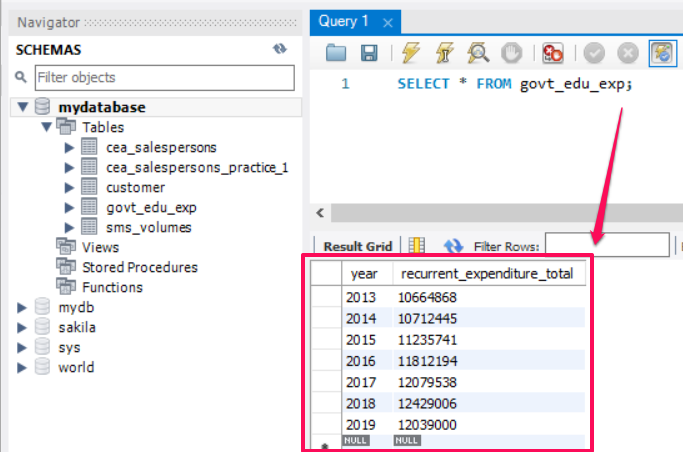

## **Dataset 2**

#### **A. Dataset & Link:** Universities - Intake, Enrolment and Graduates by Course - https://data.gov.sg/dataset/universities-intake-enrolment-and-graduates-by-course

#### **B. Nature of Dataset**
#### 1. What is in the Dataset: Contains 3 Dimensions: i. Year, ii. Sex, iii. Course and 3 Metrics: i. Intake, ii. Enrolment, iii. Graduates
#### 2. Any pecularities: Intake, Enrolment and Graduates columns have values that contain thousand separators (,). That is taken care of with the thousands=',' on read_csv.
#### _3. Note that Universities here refer to NUS, NTU, SMU, SIT, SUTD and SUSS only._
#### **C. Charts Used: Scatterplot and Boxplot**

#### **D. Insights:**
#### 1. There is a strong, positive, linear relationship between Intake and Graduates with a r-value of 0.98.
#### 2. The majority of Courses have smaller Intakes and Graduates, clustered around the quadrant that's less than 1000. (This is an indicator of the size of the cohort.)
#### 3. Across the years, Engineering Sciences have the largest Graduates cohort (median of 2535), followed by Humanities & Social Sciences (median of 1794.5).

#### __Chart 2: Scatterplot__

In [11]:
# Step 1: File Input

df_2 = pd.read_csv('CA 2 - Data/universities-intake-enrolment-and-graduates-by-course.csv',
                  sep=',', header=0, thousands=',', dtype={'year':'int64', 'sex':'string', 
                                                           'course':'string','intake':'int64',
                                                           'enrolment':'int64', 
                                                           'graduates':'int64'})

# Step 1b: Check if there are any null values and their data type
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       450 non-null    int64 
 1   sex        450 non-null    string
 2   course     450 non-null    string
 3   intake     450 non-null    int64 
 4   enrolment  450 non-null    int64 
 5   graduates  450 non-null    int64 
dtypes: int64(4), string(2)
memory usage: 21.2 KB


In [12]:
# Step 2: Processing the data
# No need for further processing

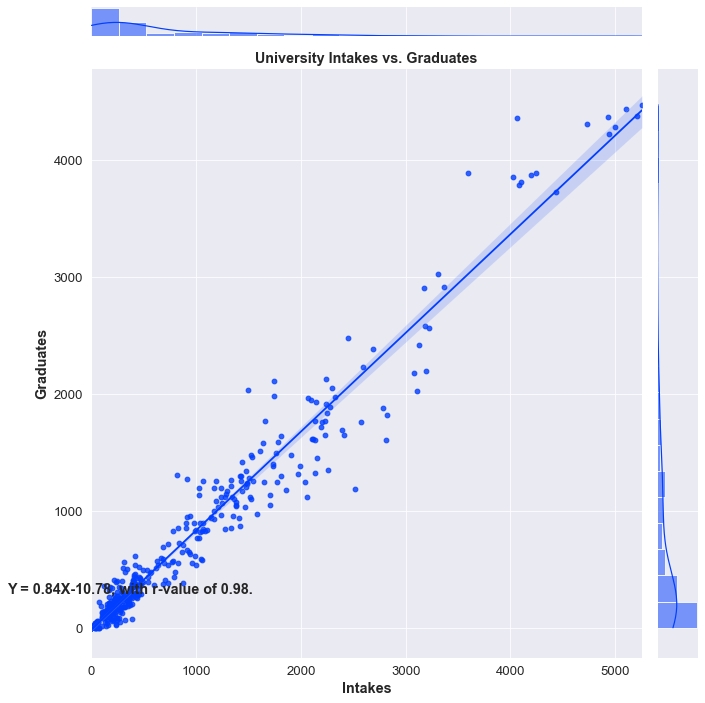

In [13]:
# Step 3: Building the Chart

# 3a Adjust the figure size and general styling first
sns.set_style(style='darkgrid')
sns.set_context('paper', font_scale=1.5)
sns.set_palette(palette='bright')

# 3b. Build the rest of the Chart elements
sns.jointplot(data=df_2, x='intake' , y='graduates', kind='reg', height=10, ratio=10) # kind='reg' adds a linear regression fit
plt.title('University Intakes vs. Graduates', fontweight='bold')
plt.xlabel('Intakes', fontweight='bold')
plt.ylabel('Graduates', fontweight='bold')

# 3c. Plot the best fit line
m, c = np.polyfit(df_2['intake'], df_2['graduates'], 1)  # m = gradient of slope, c = y-intercept
r = np.corrcoef(df_2['intake'], df_2['graduates'])[0][1] # r = Pearson product-moment correlation coefficients, which explains the linear correlation between two sets of data
plt.text(np.median(df_2['intake']), np.median(df_2['graduates']), "Y = {}X{}, with r-value of {}.".format(round(m,2), round(c,2), round(r,2)), fontweight="bold", ha="center", va="center")

# Step 4: Display Chart / Adding in Descriptors

plt.tight_layout()
plt.show()

#### _Interactive Chart_

In [14]:
# Data
x_scatter = df_2['intake']
y_scatter = df_2['graduates']

# Plot 
scatter_plot = figure(plot_width=600, plot_height=600, x_axis_label='Intakes', y_axis_label='Graduates')
scatter_plot.circle(x_scatter, y_scatter, size=10, line_color='orange', fill_color='navy', fill_alpha=0.5)
show(scatter_plot)

#### __Chart 3: Boxplot__

In [15]:
# Step 1: Processing the data - We want to find out how many graduates there are per course over the years
df_2.groupby('course')['graduates'].sum().sort_values(ascending=False)

course
Engineering Sciences                         79586
Humanities & Social Sciences                 58807
Natural, Physical & Mathematical Sciences    42813
Business & Administration                    37097
Accountancy                                  24252
Information Technology                       16530
Architecture, Building & Real Estate          9284
Health Sciences                               8248
Law                                           6820
Education                                     6340
Fine & Applied Arts                           6099
Medicine                                      5757
Mass Communication                            4539
Services                                      3823
Dentistry                                     1022
Name: graduates, dtype: int64

In [16]:
top_5_courses = list(df_2.groupby('course')['graduates'].sum().sort_values(ascending=False).index[0:5])
top_5_courses

['Engineering Sciences',
 'Humanities & Social Sciences',
 'Natural, Physical & Mathematical Sciences',
 'Business & Administration',
 'Accountancy']

In [17]:
# Step 2: Retrieve graduates from top 5 courses
df_2_graduates_top_5_courses = df_2[df_2['course'].isin(top_5_courses)]
df_2_graduates_top_5_courses

,year,sex,course,intake,enrolment,graduates
0,2005,MF,Accountancy,876,2561,706
1,2005,F,Accountancy,530,1732,495
4,2005,MF,Business & Administration,1545,5013,1256
5,2005,F,Business & Administration,901,3098,898
10,2005,MF,Engineering Sciences,4028,16599,3859
...,...,...,...,...,...,...
435,2019,F,Accountancy,780,2801,830
437,2019,F,Business & Administration,1859,5894,1178
440,2019,F,Engineering Sciences,1473,5106,1207
443,2019,F,Humanities & Social Sciences,2299,8965,2052


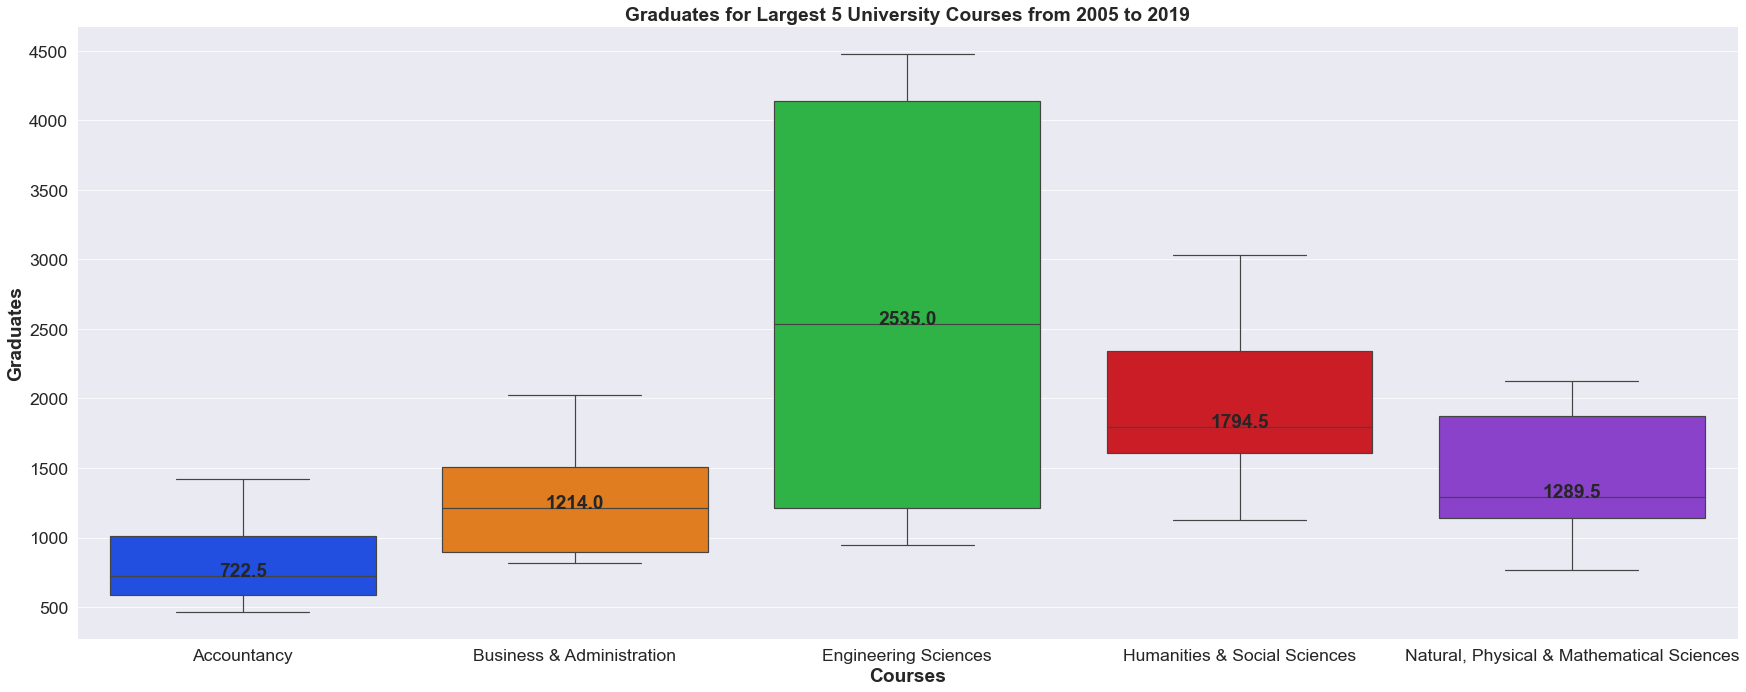

In [18]:
# Step 3: Building the Chart

# 3a Adjust the figure size and general styling first
sns.set_style(style='darkgrid')
sns.set_context('paper', font_scale=2.0)
sns.set_palette(palette='bright')
plt.figure(figsize=(25, 10))

# 3b. Build the rest of the Chart elements
box = sns.boxplot(x='course', y='graduates', data=df_2_graduates_top_5_courses)
plt.title('Graduates for Largest 5 University Courses from 2005 to 2019', fontweight='bold')
plt.xlabel('Courses', fontweight='bold')
plt.ylabel('Graduates', fontweight='bold')

# Step 4: Adding in Descriptors

medians = df_2_graduates_top_5_courses.groupby('course')['graduates'].median()
for i in range(len(medians)):
    box.annotate(str(medians[i]), xy = (i, medians[i]), horizontalalignment='center', fontweight='bold')

plt.tight_layout()
plt.show()

## **Dataset 3**

#### **A. Dataset & Link:** Graduate Employment Survey - NTU, NUS, SIT, SMU, SUSS & SUTD - https://data.gov.sg/dataset/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd

#### **B. Nature of Dataset**
#### 1. What is in the Dataset: Contains 4 Dimensions: i. Year, ii. University, iii. School, iv. Degree;
#### and 8 Metrics: i. Overall Employment Rate (%), ii.Full-Time Permanent Employment Rate (%) and metrics around Basic Monthly Salary (SGD) / Gross Monthly Salary (SGD) 
#### 2. Any pecularities: Original file was not UTF-8 encoded, so I had to convert it first before file input.

#### **C. Chart Used: Bar Chart**

#### **D. Insights:**
#### 1. In 2018, the top 10 degrees' graduates with the highest basic monthly median pay come from NUS (6) followed by SMU (3) then NTU (1).
#### 2. The top 3 degrees that have the highest basic monthly median pay are: NUS - Bachelor of Laws (5000), NUS - Bachelor of Science with Honors (4800) and SMU - Law (Cum laude and above) (4750).

In [19]:
# Step 1: File Input

df_3 = pd.read_csv('CA 2 - Data/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd (utf-8).csv', sep=',', header=0,
                  na_values='na')

# Step 1b: Check if there are any null values and their data type
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       703 non-null    int64  
 1   university                 703 non-null    object 
 2   school                     691 non-null    object 
 3   degree                     703 non-null    object 
 4   employment_rate_overall    630 non-null    float64
 5   employment_rate_ft_perm    630 non-null    float64
 6   basic_monthly_mean         630 non-null    float64
 7   basic_monthly_median       630 non-null    float64
 8   gross_monthly_mean         630 non-null    float64
 9   gross_monthly_median       630 non-null    float64
 10  gross_mthly_25_percentile  630 non-null    float64
 11  gross_mthly_75_percentile  630 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 66.0+ KB


In [20]:
# Step 2: Processing the data - We have decided to drop the rows that contain any null values since it won't make sense
df_3 = df_3.dropna()
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 0 to 702
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       621 non-null    int64  
 1   university                 621 non-null    object 
 2   school                     621 non-null    object 
 3   degree                     621 non-null    object 
 4   employment_rate_overall    621 non-null    float64
 5   employment_rate_ft_perm    621 non-null    float64
 6   basic_monthly_mean         621 non-null    float64
 7   basic_monthly_median       621 non-null    float64
 8   gross_monthly_mean         621 non-null    float64
 9   gross_monthly_median       621 non-null    float64
 10  gross_mthly_25_percentile  621 non-null    float64
 11  gross_mthly_75_percentile  621 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 63.1+ KB


In [21]:
# Filter the results for 2018 only
df_3 = df_3[df_3['year'] == 2018]

In [22]:
# Rank degrees based on basic monthly median pay
df_3 = df_3.sort_values(by='basic_monthly_median', ascending=False)
top_10_degrees = df_3[0:10]
top_10_degrees.head(3)

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
627,2018,National University of Singapore,Faculty of Law,Bachelor of Laws #,97.3,92.6,5070.0,5000.0,5263.0,5500.0,4500.0,5840.0
652,2018,National University of Singapore,Yale-NUS College,Bachelor of Science with Honours ^,89.5,78.9,5017.0,4800.0,5136.0,4800.0,3600.0,6435.0
699,2018,Singapore Management University,School of Law (4-year programme) *,Law (Cum Laude and above) #,94.4,92.6,4986.0,4750.0,5256.0,5513.0,4500.0,6000.0


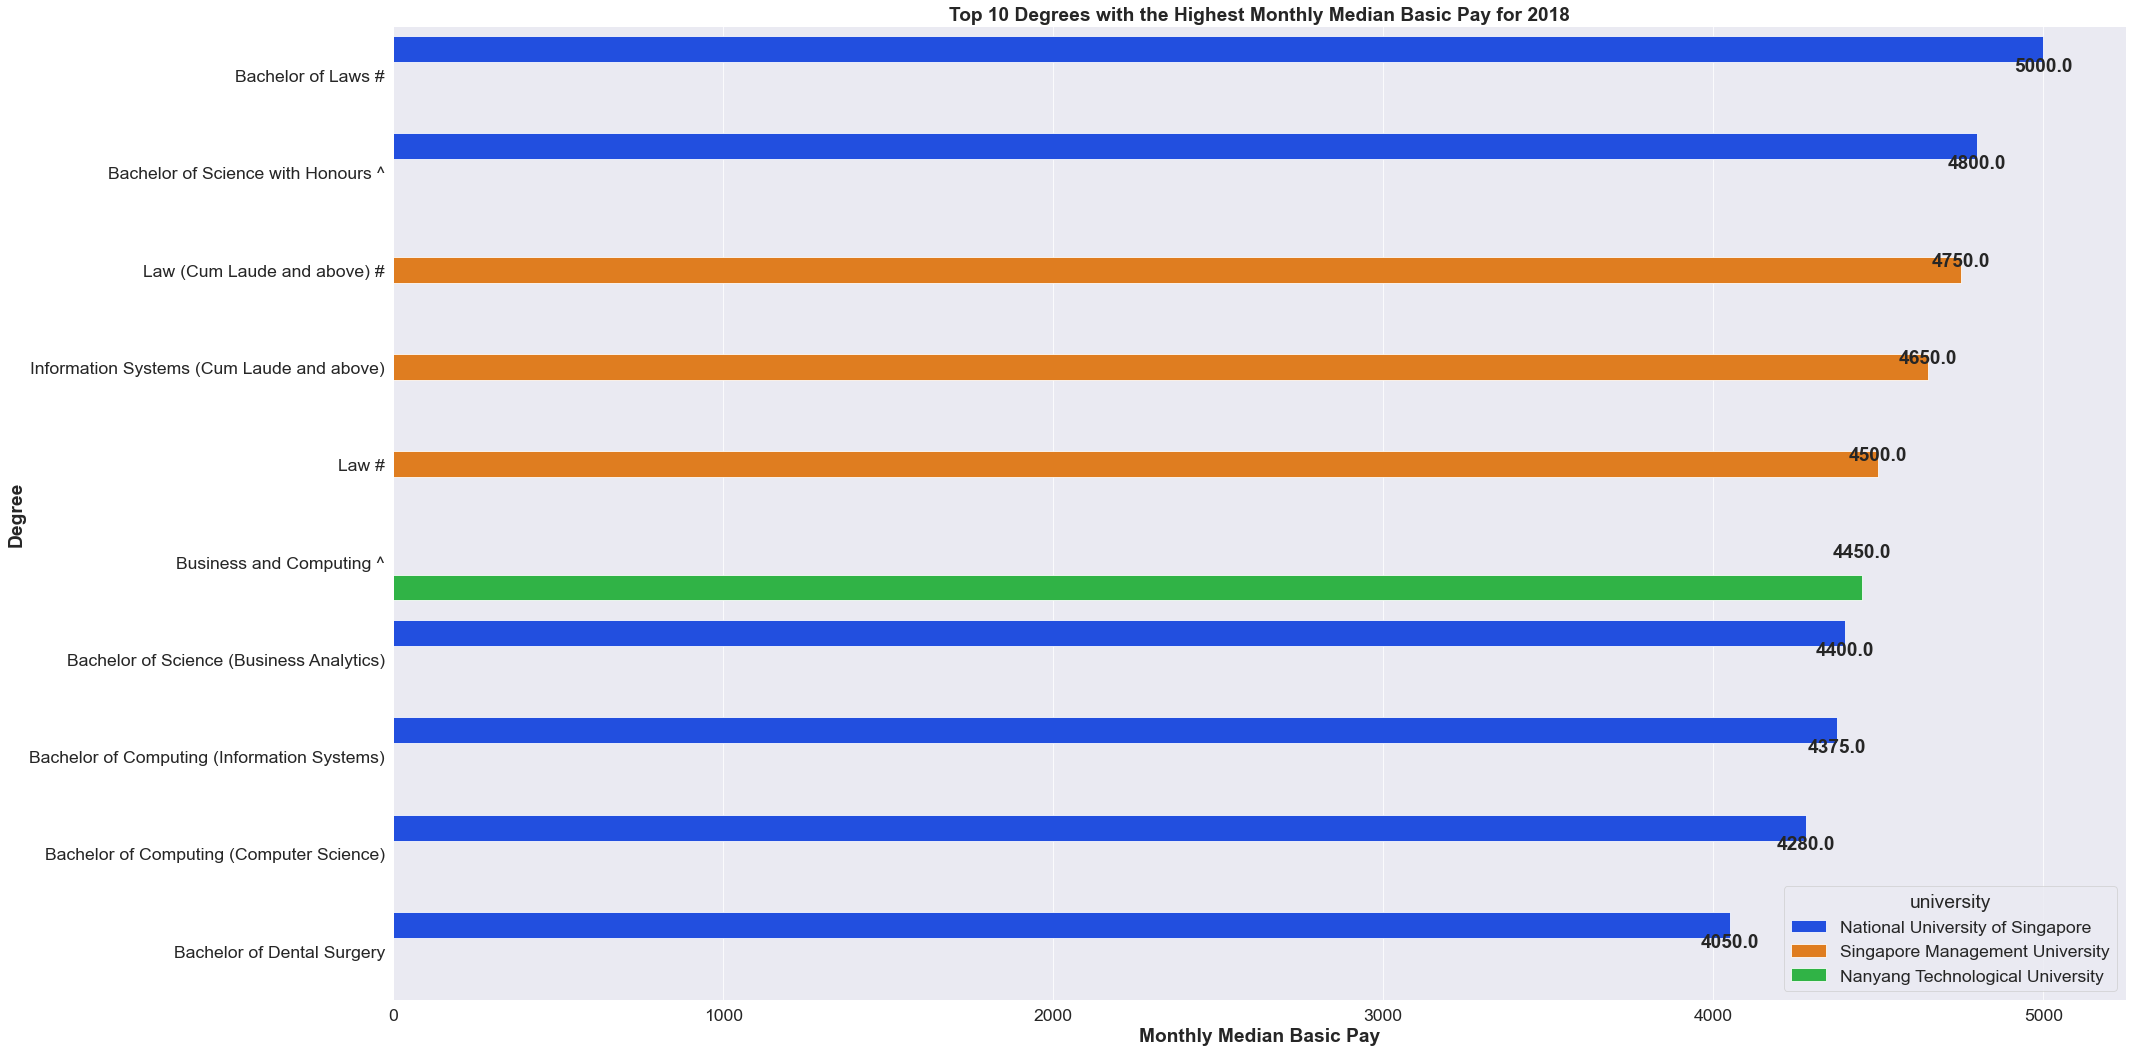

In [23]:
# Step 3: Building the Chart

# 3a Adjust the figure size and general styling first
sns.set_style(style='darkgrid')
sns.set_context('paper', font_scale=2.0)
sns.set_palette(palette='bright')
plt.figure(figsize=(30, 15))

# 3b. Build the rest of the Chart elements
bar = sns.barplot(x='basic_monthly_median', y='degree', data=top_10_degrees, hue='university')
plt.title("Top 10 Degrees with the Highest Monthly Median Basic Pay for 2018", fontweight='bold')
plt.xlabel('Monthly Median Basic Pay', fontweight='bold')
plt.ylabel('Degree', fontweight='bold')

# Step 4: Adding in Descriptors

for index, value in enumerate(top_10_degrees['basic_monthly_median']): # The enumerate() method adds counter to an iterable and returns it (the enumerate object).
    plt.text(value, index, str(value), fontweight="bold", ha="center", va="bottom")

plt.tight_layout()
plt.show()

### The End
### Thank You!